<a href="https://colab.research.google.com/github/swilsonmfc/deeplearning/blob/master/WebImagesFastAIClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Image Classification
* Grab arbitrary images from the web
* Learn to classify them using FastAI CNN


# Setup

In [0]:
from fastai.vision import *
from fastai.widgets import *

# Image Gathering


## FastAI
Grabbing web content:

Press CtrlShiftJ in Windows/Linux and CmdOptJ in Mac, and a small window the javascript 'Console' will appear. Paste in the following command.

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

## Python API
* This library will download up to 100, and can crawl related images from the main link

In [2]:
!pip install google_images_download

     |████████████████████████████████| 911kB 4.0MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=242d7044404b6c65dedd48e93b383f5c6258adcb4c3ac401c0947c4ab1ea7574
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [88]:
from google_images_download import google_images_download  

response = google_images_download.googleimagesdownload()  
  
search_queries = [ 
'dachshund',
'beagle',
'poodle',
'multipoo',
'bichon frise',
] 
  
  
def downloadimages(query): 
    # keywords is the search query 
    # format is the image file format 
    # limit is the number of images to be downloaded 
    # print urs is to print the image file url 
    # size is the image size which can 
    # be specified manually ("large, medium, icon") 
    # aspect ratio denotes the height width ratio 
    # of images to download. ("tall, square, wide, panoramic") 
    arguments = {"keywords": query, 
                 "format": "jpg", 
                 "limit":100, 
                 "print_urls":True, 
                 "size": "medium", 
                 "aspect_ratio": "panoramic"} 
    try: 
        response.download(arguments) 
      
    # Handling File NotFound Error     
    except FileNotFoundError:  
        arguments = {"keywords": query, 
                     "format": "jpg", 
                     "limit":100, 
                     "print_urls":True,  
                     "size": "medium"} 
                       
        # Providing arguments for the searched query 
        try: 
            # Downloading the photos based 
            # on the given arguments 
            response.download(arguments)  
        except: 
            pass
  
# Driver Code 
for query in search_queries: 
    downloadimages(query)  
    print()


Item no.: 1 --> Item name = bichon frise
Evaluating...
Starting Download...
Image URL: https://d17fnq9dkz9hgj.cloudfront.net/breed-uploads/2018/08/bichon-frise-card-small.jpg?bust=1535569168
Completed Image ====> 1.bichon-frise-card-small.jpg
Image URL: https://www.vetbabble.com/wp-content/uploads/2017/11/bichon-frise-1_715by3071.jpg
Completed Image ====> 2.bichon-frise-1_715by3071.jpg
Image URL: https://home.adelphi.edu/~na21969/puppy4.jpg
Completed Image ====> 3.puppy4.jpg
Image URL: https://taynews.com/wp-content/uploads/2019/10/dog-4398243_1280-1140x570.jpg
Completed Image ====> 4.dog-4398243_1280-1140x570.jpg
Image URL: https://www.smartlivingnetwork.com/cropto900x380from/uploads/20140114093743178394504.jpg
Completed Image ====> 5.20140114093743178394504.jpg
Image URL: https://www.hillspet.com/content/dam/cp-sites/hills/hills-pet/en_us/img/breeds/boy-lays-next-to-bichon-frise-on-couch.jpg
Completed Image ====> 6.boy-lays-next-to-bichon-frise-on-couch.jpg
Image URL: https://s.abcn

# Data

In [0]:
np.random.seed(1337)

batch_size=7
classes = ['beagle','dachshund','poodle','multipoo', 'bichon frise']
path = Path("/content/downloads/")

data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(), 
                                  size=224,
                                  bs=batch_size, 
                                  num_workers=4).normalize(imagenet_stats)

In [98]:
data.classes

['beagle', 'bichon frise', 'dachshund', 'multipoo', 'poodle']

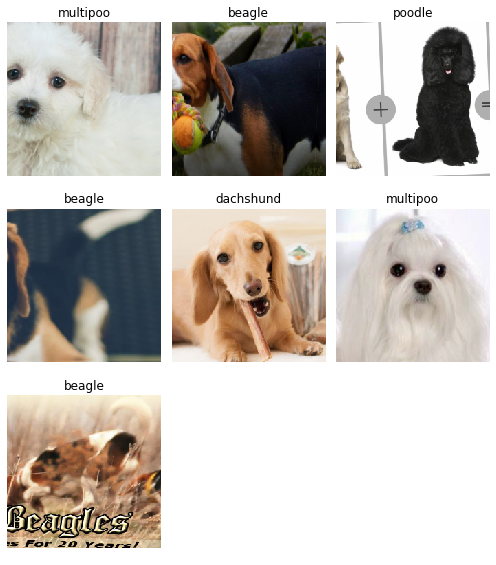

In [99]:
data.show_batch(rows=8, figsize=(7,8))

# Model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [101]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.925885,0.663872,0.223301,00:18
1,1.342205,0.817030,0.233010,00:18
2,1.192740,0.840510,0.300971,00:17
3,1.082133,0.663939,0.233010,00:18
4,0.998132,0.685323,0.252427,00:18
5,0.897225,0.643503,0.203883,00:18
6,0.758101,0.602119,0.233010,00:18
7,0.691270,0.567514,0.194175,00:18


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [104]:
learn.lr_find(start_lr=1e-6, end_lr=1e-3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


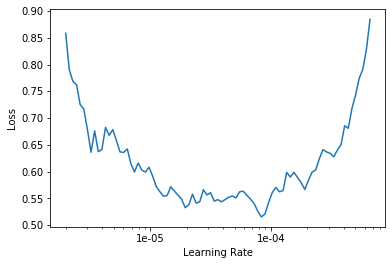

In [105]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [106]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.818881,0.809444,0.223301,00:18
1,0.748840,0.507286,0.194175,00:19


In [0]:
learn.save('stage-2')

# Results

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

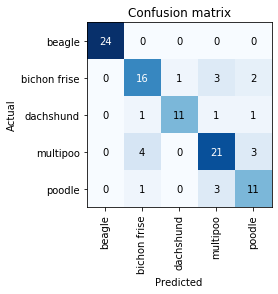

In [110]:
interp.plot_confusion_matrix()

# Predict

In [111]:
!mkdir -p /content/test_data
!ls /content/downloads/dachshund

10.dachshund.jpg
11.Dachshund-size-1.jpg
12.DachGrey.jpg
13.18880f4cf9ce4382a6c0f965fd0e50d2-800x304.dm.edit_xBhRLv.jpg
14.ravenunderwooddachshunds.jpg
15.BR_daschound_puppies_1_er_160616_12x5_608.jpg
16.dachshund-2_715by3071.jpg
17.Dachshund.jpg
18.dachshund_1024x1024.jpg
19.dachshund-dog-death.jpg
1.dachshund-card-small.jpg
20.dachshund-with-a-hungry-look-in-his-eyes.jpg
21.1554ec5a38f246f455ea86d3b32a9db7.jpg
22.a-dachshund-harness.jpg
23.Chiweenie-Chihuahua-Dachshund-Mix-1068x346.jpg
24.01_Dachshund.jpg
25.127457542-3d-rendering-of-a-dachshund-or-badger-dog-or-sausage-dog-isolated-on-white-background.jpg
26.519C7CP2JdL._SL1000_.jpg
27.123732865-3d-rendering-of-a-dachshund-or-badger-dog-or-sausage-dog-isolated-on-white-background.jpg
28.coverup.jpg
29.Dachshund-featured.jpg
2.Dachshund-Breed-Facts-Temperament-1068x346.jpg
30.124726501-3d-rendering-of-a-dachshund-dog-isolated-on-white-background.jpg
31.miniature-dachshund-card-small.jpg
32.dachshundface.jpg
33.2640bd59f3130390ca9ae61

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

## Coco

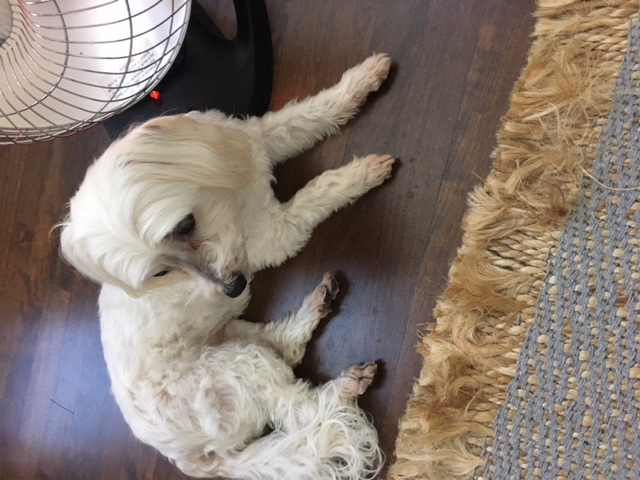

In [114]:
img = open_image(Path('/content/test_data') / 'IMG_1539.JPG')
img

In [0]:
learn = load_learner(path)

In [116]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category poodle

## Pebbles

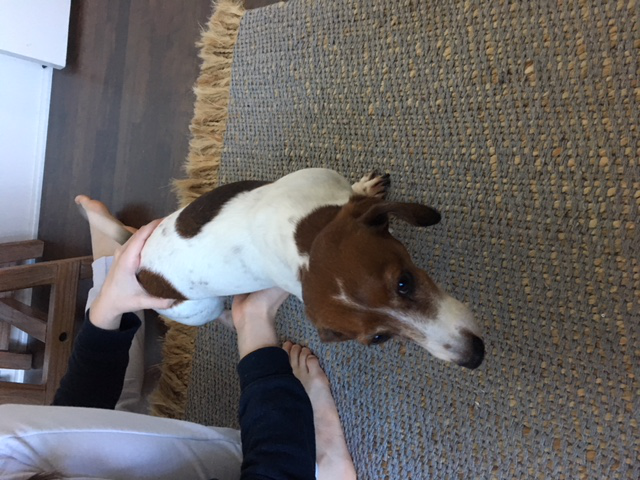

In [117]:
img = open_image(Path('/content/test_data') / 'IMG_1540.JPG')
img

In [0]:
learn = load_learner(path)

In [119]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category beagle

# Diagnostics